In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
df = pd.read_csv('HRDataset2.csv')

print(df.columns)

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'PayRate', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30'],
      dtype='object')


In [226]:
df = df.dropna(subset=['ManagerID'])
df['ManagerID'] = df['ManagerID'].astype(int)
pivot_table = df.pivot_table(index='ManagerID', columns='PerformanceScore', aggfunc='size', fill_value=0)
sum_per_manager = pivot_table.sum(axis=1)

percentage_table = pivot_table.div(sum_per_manager, axis=0) * 100

1.Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)?




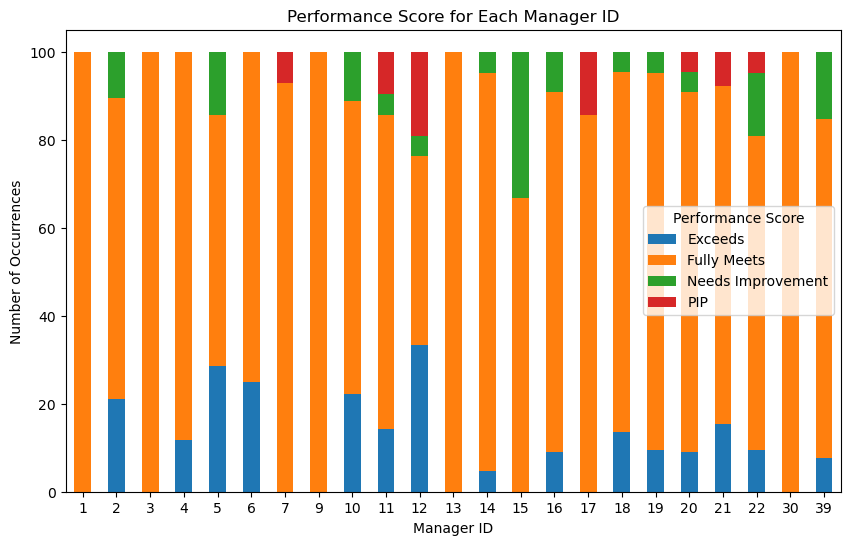

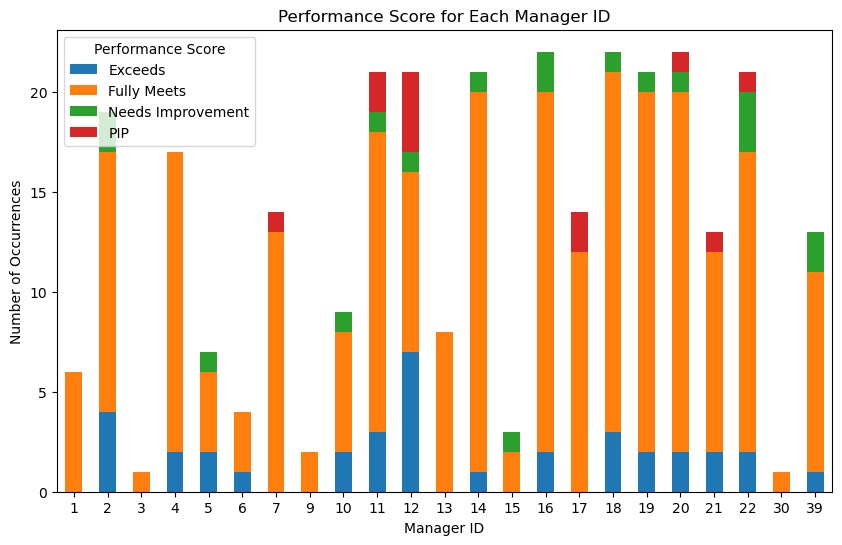

In [227]:
# Dane z tabeli przestawnej
percentage_table.plot(kind='bar', stacked=True, figsize=(10, 6))

# Ustawienia wykresu
plt.title('Performance Score for Each Manager ID')
plt.xlabel('Manager ID')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=0)
plt.legend(title='Performance Score')

pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))

# Ustawienia wykresu
plt.title('Performance Score for Each Manager ID')
plt.xlabel('Manager ID')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=0)
plt.legend(title='Performance Score')

# Pokazanie wykresu
plt.show()

1. Obserwacja:
Na podstawie wykresu nie widać korelacji pomiędzy ID managera, a oceną ofektywności.
W większych zespołach ocena efektywności jest bardziej zróżnicowana. Wszędzie domiunuje ocena 'Fully Meets'

2.Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?


RecruitmentSource
Other                                     13.125000
Careerbuilder                             13.000000
Social Networks - Facebook Twitter etc    12.181818
Search Engine - Google Bing Yahoo         12.130435
Word of Mouth                             11.833333
Diversity Job Fair                        11.793103
Billboard                                 11.750000
Monster.com                               11.208333
On-line Web application                   11.000000
Pay Per Click                             11.000000
MBTA ads                                  10.937500
Newspager/Magazine                        10.625000
Glassdoor                                 10.571429
Information Session                       10.500000
Internet Search                           10.500000
Pay Per Click - Google                    10.380952
Website Banner Ads                        10.076923
Professional Society                       9.950000
Employee Referral                          9.6

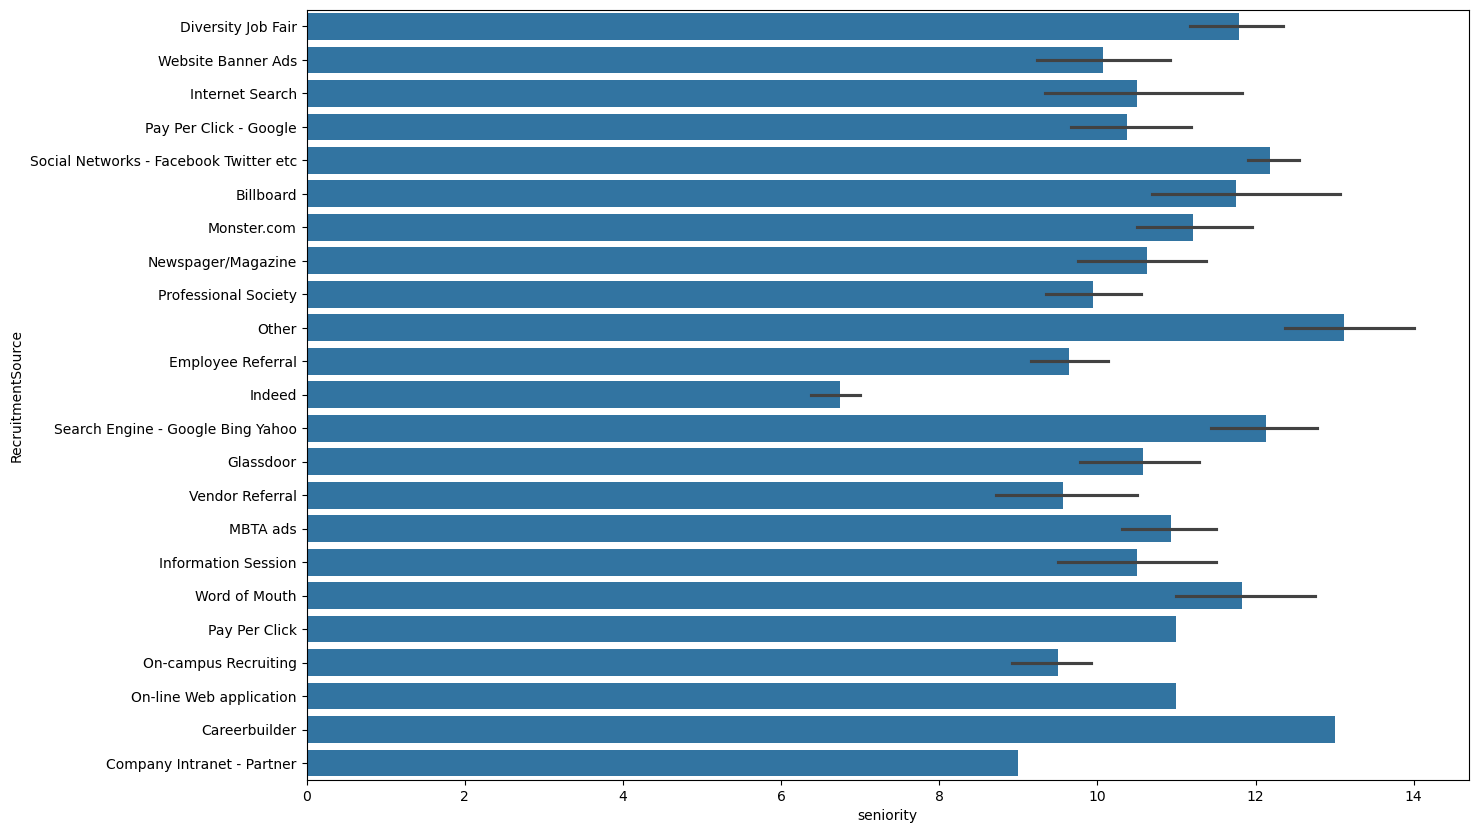

In [228]:
df['DateofHire'] = pd.to_datetime(df['DateofHire'], format='%m/%d/%Y')
roznica = pd.Timestamp.now() - df['DateofHire']

df['seniority'] = roznica.dt.days // 365


avg_tenure_by_source = df.groupby('RecruitmentSource')['seniority'].mean()


sorted_avg_tenure = avg_tenure_by_source.sort_values(ascending=False)

plt.figure(figsize=(15,10))
sns.barplot(x='seniority',y='RecruitmentSource',data=df)
print(sorted_avg_tenure)


2. Odpowiedź: 
Najdłuższym stażem pracy charakteryzują się osoby zatrudnione przez Careerbuilder, Social Networks, Search Engine.

3.Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)?

MaritalDesc
Divorced     4.033333
Married      3.743802
Separated    3.909091
Single       3.962121
Widowed      4.250000
Name: EmpSatisfaction, dtype: float64


<AxesSubplot:xlabel='MaritalDesc', ylabel='EmpSatisfaction'>

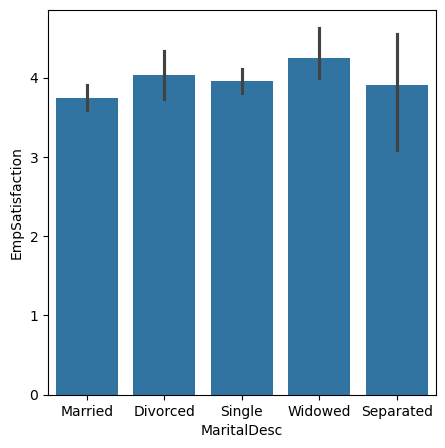

In [229]:
dex = df.groupby('MaritalDesc')['EmpSatisfaction'].mean()
print(dex)

plt.figure(figsize=(5,5))
sns.barplot(x='MaritalDesc',y='EmpSatisfaction',data=df)

3. Odpowiedź:
   Dla wszystkich stanów cywilnych ocena zadowolenia oscyluje w granicach błędu statystycznego tej samej wartości. Na podstawie danego zestawu danych, nie można stwierdzić czy istnieje korelacja pomiędzy stanem cywilnym a zadowoleniem z pracy

4.Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?

<AxesSubplot:xlabel='Sex', ylabel='Age'>

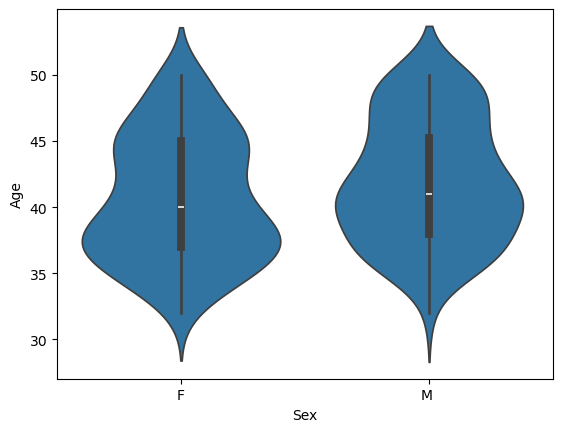

In [230]:
df['DOB'] = pd.to_datetime(df['DOB'])
df = df[df['DOB'] <= dt.datetime.now()]


today = dt.datetime.now()
df['Age'] = today.year - df['DOB'].dt.year

sns.violinplot(x='Sex',y='Age',data=df)

4.Odpowiedź : Struktura wieku aktualnie zatrudnionych kształtuje się podobnie dla obu płci. Dominująca ilość osób mieści się w przedziale wiekowym 35-45. Skrajne przedziały wiekowe 35- oraz 45+ występuiją w podobnej ilości.

5.Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?

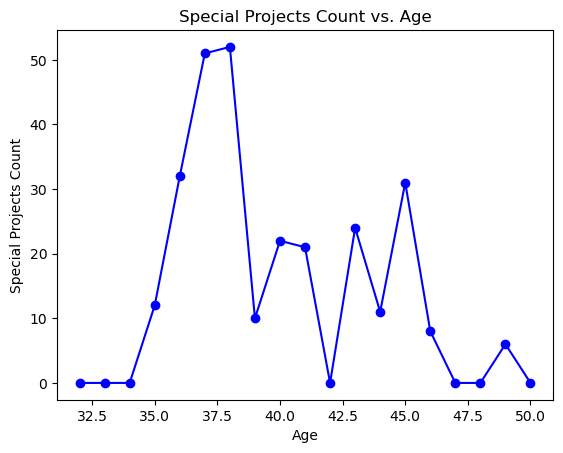

In [241]:
avg_tenure_by_source = df.groupby('Age')['SpecialProjectsCount'].sum().reset_index()

avg_tenure_by_source.columns = ['Age', 'SpecialProjectsCount']

plt.plot(avg_tenure_by_source['Age'], avg_tenure_by_source['SpecialProjectsCount'], color='blue', marker='o')


plt.title('Special Projects Count vs. Age')
plt.xlabel('Age')
plt.ylabel('Special Projects Count')

plt.show()

In [ ]:
5.Odpowiedź: Najmłodsi, jak i najstarsi pracownicyy pracują przy najmniejszej ilości projektów